In [ ]:
# install easyocr library
!pip install easyocr

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imutils 
import easyocr 
import os 

In [ ]:
# Mount google drive 
from google.colab import drive 
drive.mount("/content/gdrive")

In [ ]:
# change the directory to MyDirve 
%cd /content/gdrive/MyDrive/

In [ ]:
# create new directory for the project 
if not os.path.isdir("LicensePlateRecognition"):
  os.makedirs("LicensePlateRecognition")
  print("Directory Created ")
else:
  print("Directory Already Available")

In [ ]:
# change directory to the created directory 
%cd /content/gdrive/MyDrive/LicensePlateRecognition


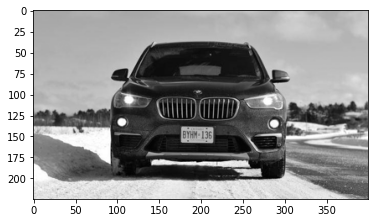

In [ ]:
# read the image using OpenCV
carImage = cv2.imread("/content/gdrive/MyDrive/LicensePlateRecognition/data/Cars25.png")
# convert the car image from BGR to gray scale 
grayImage = cv2.cvtColor(carImage, cv2.COLOR_BGR2GRAY)
# show the image using matplotlib (plt)
plt.imshow(cv2.cvtColor(grayImage, cv2.COLOR_BGR2RGB))

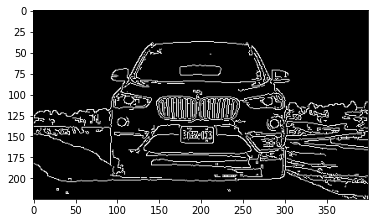

In [ ]:
#Apply bilateral filter 
bfilter = cv2.bilateralFilter(grayImage, 300, 17, 17) #Noise Reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge Detection 
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
# Make Contures 
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conturess = imutils.grab_contours(keypoints)
contures = sorted(conturess, key=cv2.contourArea, reverse=True) [:10]
print(contures)
len(contures)


In [ ]:
location = None
for contour in contures:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
len(location) 

4

In [ ]:
location


In [ ]:
approx[1][0][0]

177

In [ ]:
mask = np.zeros(grayImage.shape, np.uint8)
new_image = cv2.drawContours(mask, [location],-1 ,255, -1)
new_image = cv2.bitwise_and(carImage, carImage, mask=mask) #characters

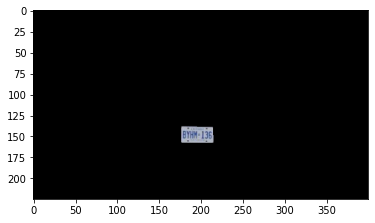

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = grayImage[x1:x2+1, y1:y2+1]

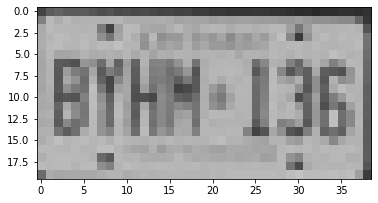

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[0, 3], [39, 3], [39, 19], [0, 19]], "BYHA' [361", 0.058183569094251625)]

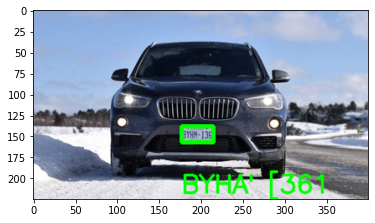

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(carImage, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(carImage, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))